In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

### Raw Dataset

In [2]:
df = pd.read_csv('H:\MY projects\project\Project\data/data-final.csv', sep='\t')
# pd.set_option('display.max_columns', None)
data = df.copy()
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


## Performing EDA (Exploratory Data Analysis)

In [3]:
print("Total number of participants: ", len(df))
print("Number of missing values: ",data.isnull().values.sum())
df.dropna(inplace=True)
print("More than 2 participants from same IP Address: ",len(df['IPC']>2))
df = df.loc[df['IPC']<=2]
print("Number of participants after eliminating missing and redundant values: ", len(df))
df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data = df.copy()

Total number of participants:  1015341
Number of missing values:  186358
More than 2 participants from same IP Address:  1012050
Number of participants after eliminating missing and redundant values:  800543


### Cleaned Data

In [4]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
#considering first 50 columns
df = df.iloc[:, 0:50]


### Visualizing participants based on thier approx location

In [6]:
lat_cor = pd.to_numeric(data['lat_appx_lots_of_err'], errors='coerce')
long_cor = pd.to_numeric(data['long_appx_lots_of_err'], errors='coerce')

In [7]:
geometry = [Point(xy) for xy in zip(long_cor, lat_cor)]

In [8]:
gdf = GeoDataFrame(data, geometry=geometry)

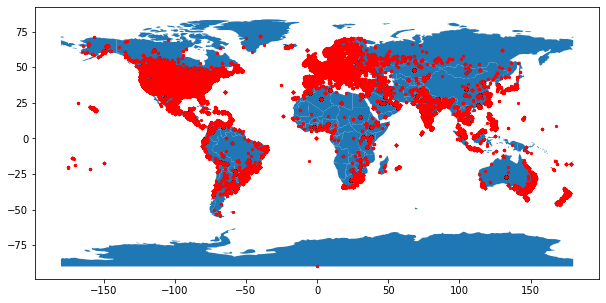

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(40, 5)), marker='o', color='red', markersize=5);



## **Personality test Questions**
#### EXT - Extraversion
#### EST - Neuroticism 
#### AGR - Agreeable 
#### CSN - Conscientious 
#### OPN - Openess

#####  The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

***
EXT1	I am the life of the party.<br>
EXT2	I don't talk a lot.<br>
EXT3	I feel comfortable around people.<br>
EXT4	I keep in the background.<br>
EXT5	I start conversations.<br>
EXT6	I have little to say.<br>
EXT7	I talk to a lot of different people at parties.<br>
EXT8	I don't like to draw attention to myself.<br>
EXT9	I don't mind being the center of attention.<br>
EXT10	I am quiet around strangers.<br>
***
EST1	I get stressed out easily.<br>
EST2	I am relaxed most of the time.<br>
EST3	I worry about things.<br>
EST4	I seldom feel blue.<br>
EST5	I am easily disturbed.<br>
EST6	I get upset easily.<br>
EST7	I change my mood a lot.<br>
EST8	I have frequent mood swings.<br>
EST9	I get irritated easily.<br>
EST10	I often feel blue.<br>
***
AGR1	I feel little concern for others.<br>
AGR2	I am interested in people.<br>
AGR3	I insult people.<br>
AGR4	I sympathize with others' feelings.<br>
AGR5	I am not interested in other people's problems.<br>
AGR6	I have a soft heart.<br>
AGR7	I am not really interested in others.<br>
AGR8	I take time out for others.<br>
AGR9	I feel others' emotions.<br>
AGR10	I make people feel at ease.<br>
***
CSN1	I am always prepared.<br>
CSN2	I leave my belongings around.<br>
CSN3	I pay attention to details.<br>
CSN4	I make a mess of things.<br>
CSN5	I get chores done right away.<br>
CSN6	I often forget to put things back in their proper place.<br>
CSN7	I like order.<br>
CSN8	I shirk my duties.<br>
CSN9	I follow a schedule.<br>
CSN10	I am exacting in my work.<br>
***
OPN1	I have a rich vocabulary.<br>
OPN2	I have difficulty understanding abstract ideas.<br>
OPN3	I have a vivid imagination.<br>
OPN4	I am not interested in abstract ideas.<br>
OPN5	I have excellent ideas.<br>
OPN6	I do not have a good imagination.<br>
OPN7	I am quick to understand things.<br>
OPN8	I use difficult words.<br>
OPN9	I spend time reflecting on things.<br>
OPN10	I am full of ideas.<br>
***

### Reverse Marking
There are certain questions that should be negetively marked.<br>
For example,  EXT2 - I don't talk a lot.<br>
This is a question in Extraversion, which means, higher score in this question tends lesser towards Extraversion

In [10]:
# Checking the columns to be re-encoded
df[["EXT2","EXT4", "EST2", "AGR1", "CSN8","OPN6"]].head()

,EXT2,EXT4,EST2,AGR1,CSN8,OPN6
0,1.0,2.0,4.0,2.0,2.0,1.0
1,5.0,4.0,3.0,1.0,3.0,1.0
2,3.0,4.0,4.0,1.0,2.0,2.0
3,2.0,3.0,3.0,2.0,3.0,1.0
4,3.0,3.0,5.0,1.0,1.0,1.0


In [11]:
#re-encoding reverse items
df.EXT2 = 6 - df.EXT2.values
df.EXT4 = 6 - df.EXT4.values
df.EXT6 = 6 - df.EXT6.values
df.EXT8 = 6 - df.EXT8.values
df.EXT10 = 6 - df.EXT10.values
df.EST2 = 6 - df.EST2.values
df.EST4 = 6 - df.EST4.values
df.AGR1 = 6 - df.AGR1.values
df.AGR3 = 6 - df.AGR3.values
df.AGR5 = 6 - df.AGR5.values
df.AGR7 = 6 - df.AGR7.values
df.CSN2 = 6 - df.CSN2.values
df.CSN4 = 6 - df.CSN4.values
df.CSN6 = 6 - df.CSN6.values
df.CSN8 = 6 - df.CSN8.values
df.OPN2 = 6 - df.OPN2.values
df.OPN4 = 6 - df.OPN4.values
df.OPN6 = 6 - df.OPN6.values

In [12]:
# checking the re-encoded values
df[["EXT2","EXT4", "EST2", "AGR1", "CSN8","OPN6"]].head()

,EXT2,EXT4,EST2,AGR1,CSN8,OPN6
0,5.0,4.0,2.0,4.0,4.0,5.0
1,1.0,2.0,3.0,5.0,3.0,5.0
2,3.0,2.0,2.0,5.0,4.0,4.0
3,4.0,3.0,3.0,4.0,3.0,5.0
4,3.0,3.0,1.0,5.0,5.0,5.0


### K-means Algorithm

![title](Resources\KmeansFlowchart.jpeg)

###  Elbow Method
Finding Optimal number of clusters

In [13]:
from sklearn.preprocessing import MinMaxScaler

columns = list(df.loc[:, df.columns != 'country'])
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform((df.loc[:, df.columns != 'country']))
df = pd.DataFrame(df, columns=columns)

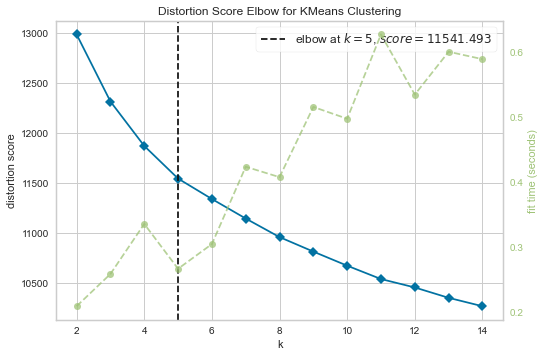

In [14]:
df_sample = df[0:5000]

# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

From above graph we can see that the optimum value is at k = 5

In [15]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5, verbose=0)
k_fit = kmeans.fit(df)
kmeans.inertia_

1879670.5437599597

In [16]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df['Clusters'] = predictions
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.8,1.0,0.6,1.0,...,1.0,0.6,0.8,1.0,2
1,0.6,0.0,0.6,0.2,0.6,...,0.8,0.4,1.0,0.6,1
2,0.4,0.4,0.8,0.2,0.6,...,1.0,0.6,0.8,0.8,1
3,0.4,0.6,0.4,0.4,0.8,...,0.8,0.8,0.6,0.6,4
4,0.6,0.4,0.6,0.4,1.0,...,1.0,0.6,1.0,1.0,2


### Analysing the model and Predictions

In [17]:
df["extraversion"] = 0
df["neuroticism"] = 0
df["agreeableness"] = 0
df["conscientiousness"] = 0
df["openness"] = 0
df["extraversion"]= (df.EXT1 + df.EXT2 + df.EXT3 + df.EXT4 + df.EXT5 + df.EXT6 + df.EXT7 + df.EXT8 + df.EXT9 + df.EXT10)/10
df["neuroticism"] = (df.EST1 + df.EST2 + df.EST3 + df.EST4 + df.EST5 + df.EST6 + df.EST7 + df.EST8 + df.EST9 + df.EST10)/10
df["agreeableness"] = (df.AGR1 + df.AGR2 + df.AGR3 + df.AGR4 + df.AGR5 + df.AGR6 + df.AGR7 + df.AGR8 + df.AGR9 + df.AGR10)/10
df["conscientiousness"] = (df.CSN1 + df.CSN2 + df.CSN3 + df.CSN4 + df.CSN5 + df.CSN6 + df.CSN7 + df.CSN8 + df.CSN9 + df.CSN10)/10
df["openness"] = (df.OPN1 + df.OPN2 + df.OPN3 + df.OPN4 + df.OPN5 + df.OPN6 + df.OPN7 + df.OPN8 + df.OPN9 + df.OPN10)/10
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,0.8,0.8,1.0,0.6,1.0,...,0.82,0.44,0.70,0.56,0.84
1,0.6,0.0,0.6,0.2,0.6,...,0.30,0.46,0.80,0.66,0.64
2,0.4,0.4,0.8,0.2,0.6,...,0.40,0.48,0.76,0.60,0.76
3,0.4,0.6,0.4,0.4,0.8,...,0.42,0.54,0.68,0.42,0.72
4,0.6,0.4,0.6,0.4,1.0,...,0.48,0.34,0.84,0.88,0.90


In [18]:
# summary statistics of the total scores
df[["extraversion", "neuroticism", "agreeableness", "conscientiousness", "openness"]].describe()

,extraversion,neuroticism,agreeableness,conscientiousness,openness
count,800543.000000,800543.000000,800543.000000,800543.000000,800543.000000
mean,0.486339,0.572746,0.670397,0.588433,0.722301
std,0.181465,0.173461,0.148036,0.148411,0.127541
min,0.000000,0.040000,0.080000,0.100000,0.120000
25%,0.340000,0.440000,0.580000,0.480000,0.640000
50%,0.480000,0.580000,0.680000,0.580000,0.740000
75%,0.620000,0.700000,0.780000,0.700000,0.820000
max,1.000000,1.000000,0.960000,0.960000,0.980000


Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [19]:
pd.options.display.max_columns = 150
df.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,extraversion,neuroticism,agreeableness,conscientiousness,openness
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.676347,0.609949,0.745536,0.491555,0.801539,0.635180,0.715831,0.444979,0.748244,0.396442,0.758700,0.421303,0.848717,0.527770,0.654840,0.690503,0.758223,0.689715,0.725062,0.649141,0.576917,0.855304,0.473513,0.837579,0.600064,0.797770,0.627734,0.774076,0.826082,0.768787,0.586811,0.266962,0.768330,0.348276,0.437287,0.288744,0.688345,0.434112,0.573093,0.696680,0.769412,0.593761,0.859020,0.621832,0.797109,0.655298,0.804111,0.693405,0.850783,0.846694,0.626560,0.672397,0.713783,0.508864,0.749143
1,0.416230,0.334650,0.608673,0.260979,0.585758,0.458505,0.433460,0.196152,0.460888,0.172099,0.702019,0.389054,0.832022,0.483578,0.567240,0.560949,0.574599,0.488762,0.596386,0.552279,0.629451,0.787673,0.661817,0.871989,0.601987,0.827916,0.595117,0.793309,0.835869,0.742154,0.763081,0.546493,0.858509,0.592192,0.641204,0.583478,0.832977,0.597879,0.758272,0.778458,0.722246,0.575922,0.781052,0.589689,0.744508,0.606793,0.804334,0.602118,0.859147,0.761508,0.392740,0.574689,0.734728,0.695254,0.704732
2,0.686443,0.605334,0.863147,0.551192,0.850093,0.666878,0.770105,0.436097,0.745849,0.494881,0.463456,0.237874,0.629977,0.337909,0.422709,0.381166,0.421647,0.335240,0.423967,0.348045,0.626124,0.885928,0.635234,0.849489,0.628174,0.766774,0.680837,0.816138,0.818841,0.839590,0.742639,0.477254,0.837019,0.621076,0.623732,0.542813,0.775611,0.616349,0.710812,0.775934,0.787416,0.654169,0.818548,0.644528,0.832644,0.669830,0.867302,0.654117,0.827065,0.858971,0.667002,0.400199,0.754713,0.672324,0.761459
3,0.353238,0.268051,0.437863,0.183891,0.449966,0.358341,0.341885,0.184794,0.433457,0.103869,0.848071,0.511634,0.900127,0.578617,0.711507,0.770700,0.794993,0.750515,0.798867,0.791800,0.499015,0.663608,0.476931,0.756633,0.476665,0.760448,0.446321,0.673473,0.723797,0.603376,0.556783,0.321699,0.762207,0.300154,0.411999,0.297317,0.710961,0.386291,0.544249,0.660952,0.708090,0.528536,0.815344,0.577823,0.687118,0.584884,0.739508,0.642309,0.860318,0.746090,0.311535,0.745683,0.608027,0.495261,0.689002
4,0.422044,0.329119,0.545925,0.305184,0.506872,0.448604,0.409268,0.285043,0.527901,0.230686,0.465584,0.273412,0.600217,0.411293,0.456443,0.397502,0.454422,0.379650,0.513337,0.456474,0.392426,0.582255,0.483244,0.550537,0.361792,0.523619,0.389173,0.565778,0.515599,0.594552,0.634367,0.425909,0.742983,0.519546,0.468211,0.452482,0.685040,0.498909,0.550686,0.679228,0.732944,0.623950,0.737832,0.606198,0.738515,0.602827,0.795840,0.645747,0.762870,0.747695,0.401065,0.440833,0.495897,0.565736,0.699442


In [20]:
# Summing up the different questions groups
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()


,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,0.626560,0.672397,0.713783,0.508864,0.749143
1,0.392740,0.574689,0.734728,0.695254,0.704732
2,0.667002,0.400199,0.754713,0.672324,0.761459
3,0.311535,0.745683,0.608027,0.495261,0.689002
4,0.401065,0.440833,0.495897,0.565736,0.699442


### visualizing the personality trait pattern for each cluster

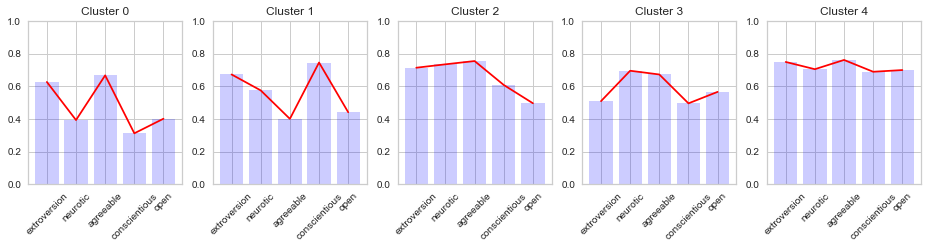

In [21]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(16,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='blue', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,1)

### Visualizing the clusters

In [22]:
# In order to visualize in 2D graph we will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-0.091299,-1.054445,2
1,-0.738786,-0.013029,1
2,-0.782405,-0.157976,1
3,2.103504,0.002969,4
4,0.030872,-1.067680,2


Text(0.5, 1.0, 'Personality Clusters after PCA')

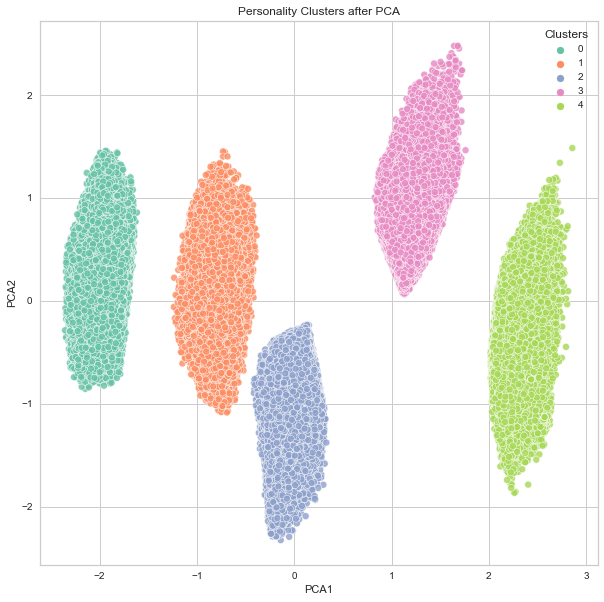

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

In [24]:
# Considering only countries with responses more than 1000
df = df.join(data["country"])
df1 = df[["country","Clusters"]]
df1 = df.groupby("country").filter(lambda x: len(x) > 1000)

#df1.isnull().values.any()

In [25]:
data.isnull().values.any()
df.shape

(800543, 57)

### Personalities based on geographical regions

In [26]:
df1["country"]
df1 = df1.replace(to_replace='NONE', value=np.nan).dropna()

In [27]:

countries = df1['country'].unique()

for i in countries:
    c = df1[df1['country'].str.contains(i)]
    result = list(c.Clusters.mode())
    print(i, "   Clusters:", result)

GB    Clusters: [0]
MY    Clusters: [3]
KE    Clusters: [1]
SE    Clusters: [0]
US    Clusters: [1]
FI    Clusters: [3]
PH    Clusters: [3]
FR    Clusters: [0]
AU    Clusters: [0]
IN    Clusters: [0]
CA    Clusters: [0]
ZA    Clusters: [1]
HK    Clusters: [0]
BR    Clusters: [3]
CH    Clusters: [2]
TH    Clusters: [4]
IT    Clusters: [3]
ES    Clusters: [0]
AE    Clusters: [0]
HR    Clusters: [3]
GR    Clusters: [3]
IE    Clusters: [0]
DE    Clusters: [4]
PT    Clusters: [3]
NL    Clusters: [2]
SG    Clusters: [3]
RO    Clusters: [3]
NO    Clusters: [2]
LT    Clusters: [3]
ID    Clusters: [3]
BE    Clusters: [0]
AT    Clusters: [2]
DK    Clusters: [0]
PL    Clusters: [3]
JP    Clusters: [4]
MX    Clusters: [0]
TR    Clusters: [3]
CO    Clusters: [0]
AR    Clusters: [0]
HU    Clusters: [0]
PK    Clusters: [0]
CZ    Clusters: [3]
NZ    Clusters: [0]
RS    Clusters: [3]
IL    Clusters: [0]
CL    Clusters: [0]
SA    Clusters: [3]
VN    Clusters: [3]
PE    Clusters: [0]
VE    Clusters: [0]


### Number of participants from each clusters in India

In [28]:
india = df1[df1['country'].str.contains('IN')]
india_counts = india.Clusters.value_counts()
print(india_counts)

0    3111
3    2960
2    2736
1    2474
4    2323
Name: Clusters, dtype: int64


### Number of participants in each cluster

In [29]:
df1['Clusters'].value_counts()

0    169312
1    161780
2    159810
3    152115
4    122487
Name: Clusters, dtype: int64

### Classifying new participants

After the new partcipants answered the questionnaire, their responses was copied to an excel spreadsheet

In [30]:
my_data = pd.read_excel(r"H:\MY projects\project\Project\my_personality_test.xls")
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,5,3,3,4,4,3,2,4,3,2,2,3,4,3,4,2,1,2,3,2,3,1,5,2,4,3,4,4,4,2,3,4,2,3,4,5,1,3,3,3,1,4,2,5,2,4,3,4,4
1,4,2,4,2,4,1,4,2,4,4,4,3,4,3,2,3,3,1,4,2,1,5,2,4,3,5,2,3,4,5,3,4,3,3,2,3,3,2,2,3,5,1,5,1,3,1,5,4,5,5
2,4,2,4,2,4,1,4,2,4,4,1,2,2,2,3,2,3,2,2,1,2,3,2,4,3,5,2,3,4,5,3,4,5,5,5,5,3,4,3,3,5,1,5,1,3,1,5,4,5,5
3,1,4,2,4,3,4,2,3,2,4,3,5,3,3,3,2,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,1,3,1,2,2,2,1,1,1,2,1
4,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5


In [31]:
my_personality = k_fit.predict(my_data)
for personality in range(len(my_personality)):
    print("personality of person",personality+1,":",my_personality[personality])
    

personality of person 1 : 2
personality of person 2 : 0
personality of person 3 : 2
personality of person 4 : 0
personality of person 5 : 2


In [32]:
MYcol_list = list(my_data)
ext = MYcol_list[0:10]
est = MYcol_list[10:20]
agr = MYcol_list[20:30]
csn = MYcol_list[30:40]
opn = MYcol_list[40:50]


my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10

my_sums['cluster'] = my_personality
my_sums

,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.3,2.6,3.2,3.0,3.2,2
1,3.1,2.9,3.4,2.8,3.5,0
2,3.1,2.0,3.3,4.0,3.5,2
3,2.9,3.5,2.5,2.3,1.6,0
4,3.0,2.4,3.1,3.2,3.3,2


### Getting top scorers in particular personality trait

Below code shows for "extroversion" personality trait

In [33]:
ndf = data_sums.copy()
ndf.sort_values(by="extroversion", ascending=False, kind="mergesort")

,extroversion,neurotic,agreeable,conscientious,open,clusters
42826,1.00,0.22,0.82,0.82,0.68,2
616077,0.94,0.30,0.70,0.44,0.82,2
17957,0.92,0.36,0.60,0.78,0.66,2
80194,0.92,0.14,0.76,0.84,0.74,2
84133,0.92,0.22,0.84,0.78,0.94,2
...,...,...,...,...,...,...
789188,0.08,0.24,0.62,0.48,0.68,4
408723,0.06,0.88,0.40,0.64,0.72,3
431535,0.06,0.66,0.58,0.48,0.74,3
560449,0.06,0.86,0.56,0.72,0.70,3
